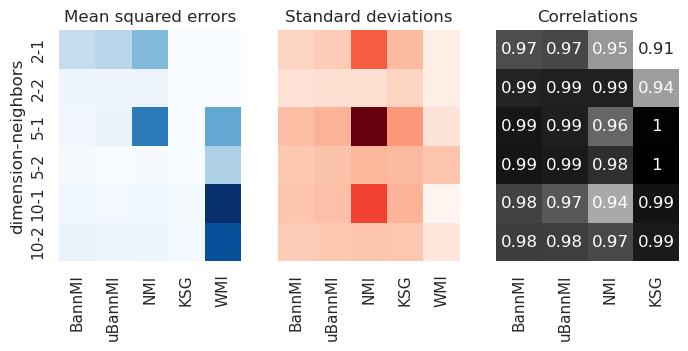

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1,3, figsize=(8,3))
sns.set(font_scale=1.)
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
# Gaussian heatmaps
key = []
m_index = []
for d in [2,5,10]:
    for j in [1,2]:
        key.append('dim_' + str(d) + '_k_' + str(j))
        m_index.append((d,j))
m_index = pd.MultiIndex.from_tuples(m_index, names=['dimension', 'neighbors']) 
MSE=[]
SD = []
for k in key:
    X = pd.read_hdf('~/nn_info_git/src/MI_gauss.h5', key=k)
    Y = pd.read_hdf('~/nn_info_git/src/MI_gauss_sd.h5', key=k)
    mse = []
    sd = []
    cols = list(X.columns)
    for c in cols[1:]:
        mse.append(np.mean((X.truth - X.loc[:,c])**2))
        sd.append(Y.mean(axis=0)[c])
    MSE.append(pd.Series(mse,index=cols[1:]))
    SD.append(pd.Series(sd,index=cols[1:]))
MSE = pd.DataFrame(MSE, index=m_index)
SD = pd.DataFrame(SD, index = m_index)

COR=[]
for k in key:
    X = pd.read_hdf('~/nn_info_git/src/MI_gauss.h5', key=k)
    cor = []
    for c in cols[1:-1]:
        cor.append(np.corrcoef(X.truth,X.loc[:,c])[0,1])
    COR.append(pd.Series(cor,index=cols[1:-1]))
COR = pd.DataFrame(COR, index=m_index)
COR.columns = ['BannMI', 'uBannMI', 'NMI', 'KSG']
MSE.columns = ['BannMI', 'uBannMI', 'NMI', 'KSG', 'WMI']
SD.columns = ['BannMI', 'uBannMI', 'NMI', 'KSG', 'WMI']




#ax0 = subsubfigs0[1].subplots(1,3)
ax[0].set_title('Mean squared errors')
sns.heatmap(MSE, ax = ax[0], cmap='Blues', cbar=False)

sns.heatmap(SD, ax = ax[1], cmap='Reds', cbar=False)
ax[1].set_title('Standard deviations')
ax[1].set_ylabel('')
ax[1].set_yticklabels('')

sns.heatmap(COR, annot=True, ax = ax[2], cmap='binary', cbar=False)
ax[2].set_title('Correlations')
ax[2].set_ylabel('')
ax[2].set_yticklabels('')
MSE.mean(axis=0)


fig.savefig('key_indicators.eps', format = 'eps', bbox_inches='tight', dpi=350)
plt.show()